In [275]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings("ignore")

In [276]:
tourist_data = pd.read_csv('C:/Users/Javin/OneDrive/Desktop/lab-task/enriched_tourist_trajectory.csv') # enter your file address here

In [277]:
tourist_data.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,Accommodation,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,NightlifeTrip
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,Accommodation,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,SpaTrip
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,Accommodation,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,SpaTrip
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,Accommodation,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,FoodAndDrinkTrip
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,Accommodation,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,NightlifeTrip


In [278]:
tourist_data.tail()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ,pIK42Fr5jzBmFyjny+Qp5M0amaQ_trip_20190417174454,2019-04-17 17:44:54,2019-04-17 17:56:55,Accommodation,Residential Building (Apartment / Condo),Spa,Spa,13.72068,100.75131,13.72225,100.72910,3070,12.02,High spending tourist,SpaTrip
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs,UL3za2TYuY4nfS/gRX8sSbhw/Xs_trip_20190417185526,2019-04-17 18:55:26,2019-04-17 19:07:02,Accommodation,Residential Building (Apartment / Condo),Restaurant,Korean Restaurant,13.84509,100.58338,13.83998,100.57480,1542,11.60,High spending tourist,FoodAndDrinkTrip
33026,/uLPd/8sedu4wRkR7+MdKxMcME4,/uLPd/8sedu4wRkR7+MdKxMcME4_trip_20190417163626,2019-04-17 16:36:26,2019-04-17 16:55:10,Accommodation,Hotel,Spa,Spa,13.52704,100.42049,13.64756,100.43121,13879,18.73,High spending tourist,SpaTrip
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ_trip_20190417181215,2019-04-17 18:12:15,2019-04-17 19:06:16,Accommodation,Hotel,Restaurant,Restaurant,13.77877,100.81404,13.85921,100.81598,24127,54.02,High spending tourist,FoodAndDrinkTrip
33028,xA5oQGr1nCyJLz7LpTWIZwfKQyc,xA5oQGr1nCyJLz7LpTWIZwfKQyc_trip_20190417155408,2019-04-17 15:54:08,2019-04-17 15:58:08,Accommodation,Hotel,Restaurant,Restaurant,13.93067,100.60017,13.92659,100.59520,872,4.00,High spending tourist,FoodAndDrinkTrip


In [279]:
tourist_data.shape

(33029, 16)

In [280]:
tourist_data.columns

Index(['VehicleID', 'trajectory_id', 'date_time_o', 'date_time_d',
       'category_o', 'subcategory_o', 'category_d', 'subcategory_d', 'lat_o',
       'lon_o', 'lat_d', 'lon_d', 'distance', 'time_used', 'tourist_type',
       'trajectory_type'],
      dtype='object')

In [281]:
tourist_data.describe()

,lat_o,lon_o,lat_d,lon_d,distance,time_used
count,33029.000000,33029.00000,33029.000000,33029.000000,33029.000000,33029.000000
mean,13.758020,100.55886,13.757579,100.557162,5457.901632,23.855624
std,0.052059,0.05900,0.050423,0.060572,10735.314645,55.047319
min,13.527040,100.33311,13.596280,100.333460,501.000000,1.050000
25%,13.725500,100.51593,13.726400,100.516680,1819.000000,8.000000
50%,13.747820,100.55764,13.746120,100.554410,3423.000000,13.200000
75%,13.776680,100.59153,13.778910,100.586370,6513.000000,24.000000
max,13.948840,100.88266,13.949210,100.870710,997684.000000,1439.900000


In [282]:
tourist_data.isnull().sum()

VehicleID          0
trajectory_id      0
date_time_o        0
date_time_d        0
category_o         0
subcategory_o      0
category_d         0
subcategory_d      0
lat_o              0
lon_o              0
lat_d              0
lon_d              0
distance           0
time_used          0
tourist_type       0
trajectory_type    0
dtype: int64

In [283]:
tourist_data.nunique()

VehicleID           3273
trajectory_id      32580
date_time_o        31163
date_time_d        31253
category_o             1
subcategory_o         12
category_d             6
subcategory_d        146
lat_o              13170
lon_o              14555
lat_d              14074
lon_d              15299
distance           11586
time_used           4408
tourist_type           2
trajectory_type        6
dtype: int64

#### Assumptions:
1. (Sub)Category_o gives info about place of stay of tourist
2. (Sub)Category_o gives info about place where same tourist has travelled
3. erroneous data have 1963 as year in date_time_o (index:2499,8779,491,2431,6897) was removed from dataset
4. distance and time_used gives dist & time of tourist destination from place of stay

In [284]:
# Converting datetime present in string to datetime format
tourist_data['date_time_d'] = pd.to_datetime(tourist_data['date_time_d'], infer_datetime_format=True)
tourist_data['date_time_o'] = pd.to_datetime(tourist_data['date_time_o'], infer_datetime_format=True)

In [285]:
tourist_data['category_d'].unique()

array(['NightClub/Bar', 'Spa', 'Restaurant', 'Shopping Mall', 'Religious',
       'Leisure'], dtype=object)

In [286]:
tourist_data['subcategory_o'].unique()

array(['Hotel', 'Hostel', 'Bed & Breakfast',
       'Residential Building (Apartment / Condo)', 'Inn', 'Apartment',
       'Resort', 'inn', 'Homestay', 'Condo', 'Hotel Pool', 'Mansion'],
      dtype=object)

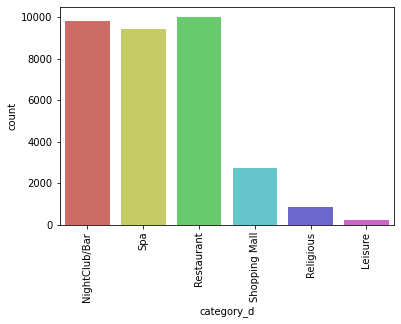

In [287]:
plt.Figure(figsize=(15,6))
sns.countplot('category_d', data= tourist_data, palette='hls')
plt.xticks(rotation=90)
plt.show()

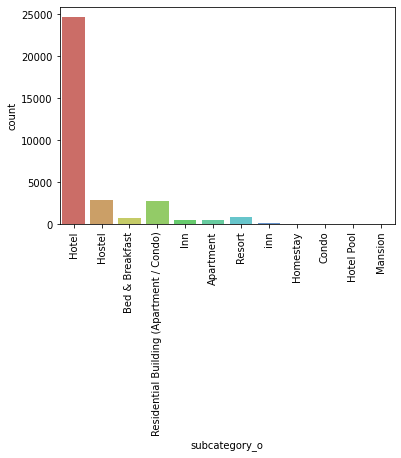

In [288]:
plt.Figure(figsize=(15,6))
sns.countplot('subcategory_o', data= tourist_data, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [289]:
tourist_data['subcategory_o'].value_counts()

Hotel                                       24668
Hostel                                       2841
Residential Building (Apartment / Condo)     2763
Resort                                        880
Bed & Breakfast                               734
Inn                                           515
Apartment                                     484
inn                                            86
Homestay                                       20
Condo                                          20
Hotel Pool                                     14
Mansion                                         4
Name: subcategory_o, dtype: int64

Removed trajectory type as I found it was exactly same/similar as category_d using lambda function to check if .str contains nightlifetrip where cateogry_d = nightclub & so on

In [290]:
tourist_data = tourist_data.drop(['trajectory_type'], axis=1)

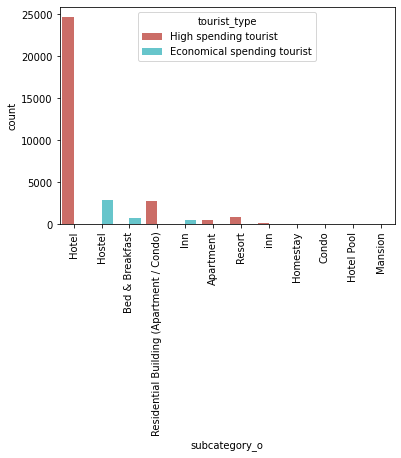

In [291]:
plt.Figure(figsize=(15,6))
sns.countplot('subcategory_o', hue='tourist_type', data=tourist_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

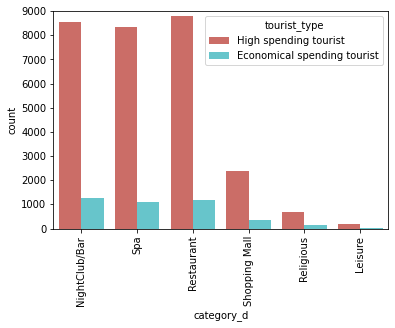

In [292]:
plt.Figure(figsize=(15,6))
sns.countplot('category_d', hue='tourist_type', data=tourist_data, palette='hls')
plt.xticks(rotation = 90)
plt.ylim(0,9000)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

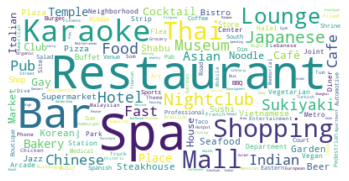

In [293]:
from wordcloud import WordCloud, STOPWORDS
wcloud_text = " ".join(place for place in tourist_data.subcategory_d)
wordcloud = WordCloud(collocations = False, background_color="white").generate(wcloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

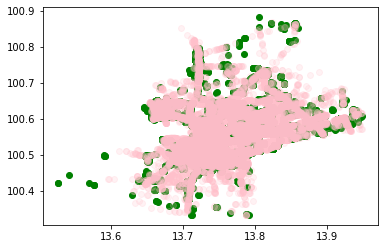

In [294]:
plt.scatter(x=tourist_data['lat_o'], y=tourist_data['lon_o'], color='green')
plt.scatter(x=tourist_data['lat_d'], y=tourist_data['lon_d'], color='pink', alpha=0.2)
plt.show()

This shows that most tourists live nearby places where they (plan to) visit.

In [296]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [297]:
df = tourist_data
df['hour_o'] = pd.to_datetime(df['date_time_o']).dt.hour
df['hour_d'] = pd.to_datetime(df['date_time_d']).dt.hour
df['day_d'] = pd.to_datetime(df['date_time_d']).dt.day_name()
df['day_o'] = pd.to_datetime(df['date_time_o']).dt.day_name()
df = df.drop(['VehicleID','trajectory_id','category_o','date_time_o','date_time_d'], axis=1) #removing category_o as its same (accomadation) for all rows
df

,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,hour_o,hour_d,day_d,day_o
0,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,20,20,Thursday,Thursday
1,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,13,13,Thursday,Thursday
2,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,13,13,Thursday,Thursday
3,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,15,15,Thursday,Thursday
4,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,20,20,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,Residential Building (Apartment / Condo),Spa,Spa,13.72068,100.75131,13.72225,100.72910,3070,12.02,High spending tourist,17,17,Wednesday,Wednesday
33025,Residential Building (Apartment / Condo),Restaurant,Korean Restaurant,13.84509,100.58338,13.83998,100.57480,1542,11.60,High spending tourist,18,19,Wednesday,Wednesday
33026,Hotel,Spa,Spa,13.52704,100.42049,13.64756,100.43121,13879,18.73,High spending tourist,16,16,Wednesday,Wednesday
33027,Hotel,Restaurant,Restaurant,13.77877,100.81404,13.85921,100.81598,24127,54.02,High spending tourist,18,19,Wednesday,Wednesday


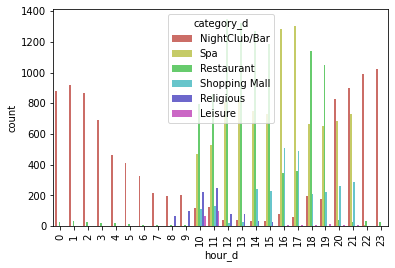

In [298]:
plt.Figure(figsize=(30,30))
sns.countplot('hour_d', hue='category_d', data=df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

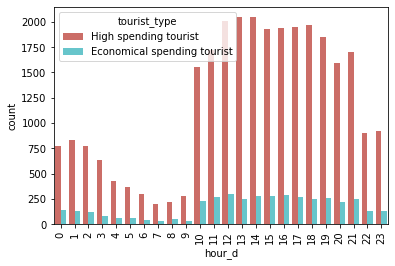

In [299]:
plt.Figure(figsize=(30,30))
sns.countplot('hour_d', hue='tourist_type', data=df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [300]:
tourist_data_1 = tourist_data[['subcategory_o', 'category_d', 'subcategory_d', 'tourist_type', 'hour_o', 'hour_d', 'day_d', 'day_o']]

In [301]:
tourist_data_1.loc[:,:] = tourist_data_1.loc[:,:].apply(label_encoder.fit_transform)
tourist_data_1

,subcategory_o,category_d,subcategory_d,tourist_type,hour_o,hour_d,day_d,day_o
0,5,1,75,1,20,20,4,4
1,5,5,124,1,13,13,4,4
2,5,5,124,1,13,13,4,4
3,5,3,137,1,15,15,4,4
4,5,1,78,1,20,20,4,4
...,...,...,...,...,...,...,...,...
33024,9,5,124,1,17,17,6,6
33025,9,3,76,1,18,19,6,6
33026,5,5,124,1,16,16,6,6
33027,5,3,111,1,18,19,6,6


In [302]:
df[list(tourist_data_1.columns)] = tourist_data_1
df = df.apply(pd.to_numeric, errors='coerce')
df

,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,hour_o,hour_d,day_d,day_o
0,5,1,75,13.66364,100.61409,13.66240,100.62025,682,5.00,1,20,20,4,4
1,5,5,124,13.66335,100.61517,13.66139,100.60623,1103,5.33,1,13,13,4,4
2,5,5,124,13.66348,100.61439,13.67699,100.60824,5809,16.00,1,13,13,4,4
3,5,3,137,13.66378,100.61318,13.65897,100.60102,1844,8.00,1,15,15,4,4
4,5,1,78,13.66310,100.61558,13.66840,100.63408,4259,12.93,1,20,20,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,9,5,124,13.72068,100.75131,13.72225,100.72910,3070,12.02,1,17,17,6,6
33025,9,3,76,13.84509,100.58338,13.83998,100.57480,1542,11.60,1,18,19,6,6
33026,5,5,124,13.52704,100.42049,13.64756,100.43121,13879,18.73,1,16,16,6,6
33027,5,3,111,13.77877,100.81404,13.85921,100.81598,24127,54.02,1,18,19,6,6


<AxesSubplot:>

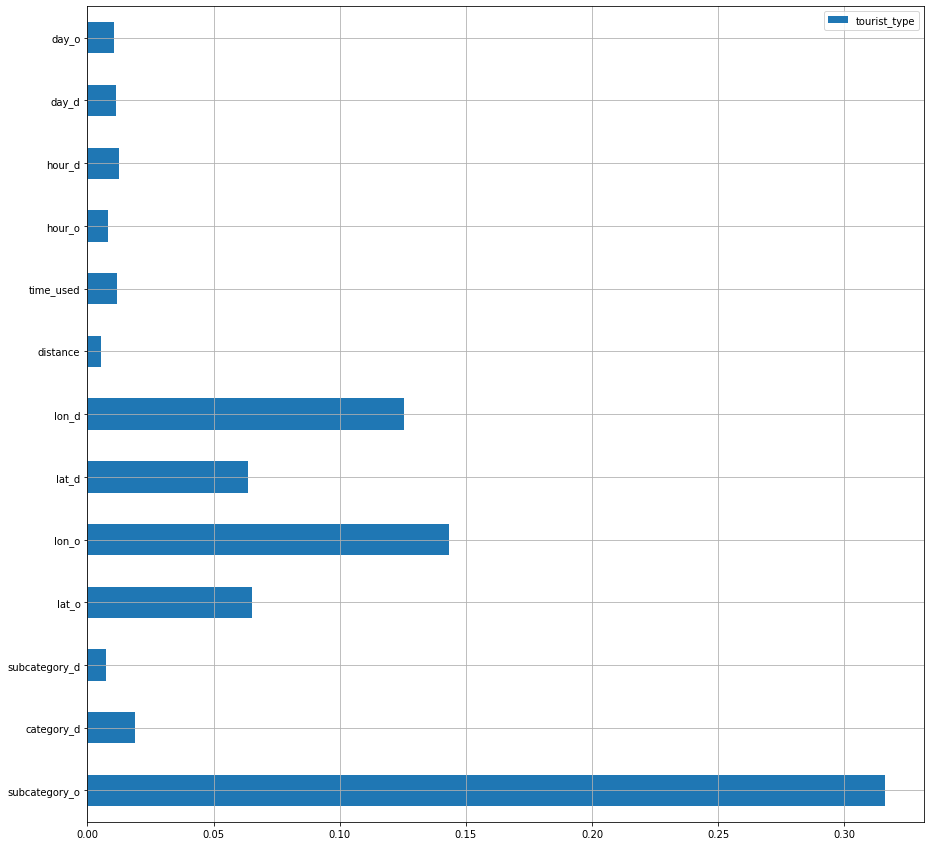

In [303]:
corr = pd.DataFrame(df.corr()['tourist_type']).drop('tourist_type', axis=0)
corr.plot(kind='barh',grid=True,figsize=(15,15))

Correlation plot b/w variables and type of tourist (economic vs heavy spender)

In [304]:
# Taking those variables as features which have statistically significant correlation 
feature_columns = []
for x in corr.index:
    if corr.loc[x].values > 0.05:
        feature_columns.append(x)
    elif corr.loc[x].values < -0.1:
        feature_columns.append(x)

feature_columns

['subcategory_o', 'lat_o', 'lon_o', 'lat_d', 'lon_d']

In [305]:
x = df[feature_columns]
y = df['tourist_type']

In [306]:
from sklearn.preprocessing import StandardScaler #for normalizing ddata
scaler = StandardScaler()

In [307]:
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
print(x.shape)
print(y.shape)

(33029, 5)
(33029,)


Cross-validation can be implemented for test-train split for a more accurate comparison 

In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=4, random_state=4)

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [310]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [311]:
lr_pred= lr.predict(x_test)

In [312]:
print("Training Accuracy :", lr.score(x_train, y_train))
print("Testing Accuracy :", lr.score(x_test, y_test))
print('Logistic Regression Accuracy Score:', accuracy_score(lr_pred,y_test))

Training Accuracy : 0.8813020439061318
Testing Accuracy : 1.0
Logistic Regression Accuracy Score: 1.0


In [313]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [314]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))
print('Random forest Accuracy Score:', rf.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0
Random forest Accuracy Score: 1.0


In [315]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [316]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))
print('xgb Accuracy Score:', accuracy_score(xgb_pred,y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0
xgb Accuracy Score: 1.0


In [317]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [318]:
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [319]:
print("Training Accuracy :", dt.score(x_train, y_train))
print("Testing Accuracy :", dt.score(x_test, y_test))
print('decision tree Accuracy Score:', accuracy_score(dt_pred,y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0
decision tree Accuracy Score: 1.0


(Models have low bias but some overfiting as cross-validation implementation gives more variance)